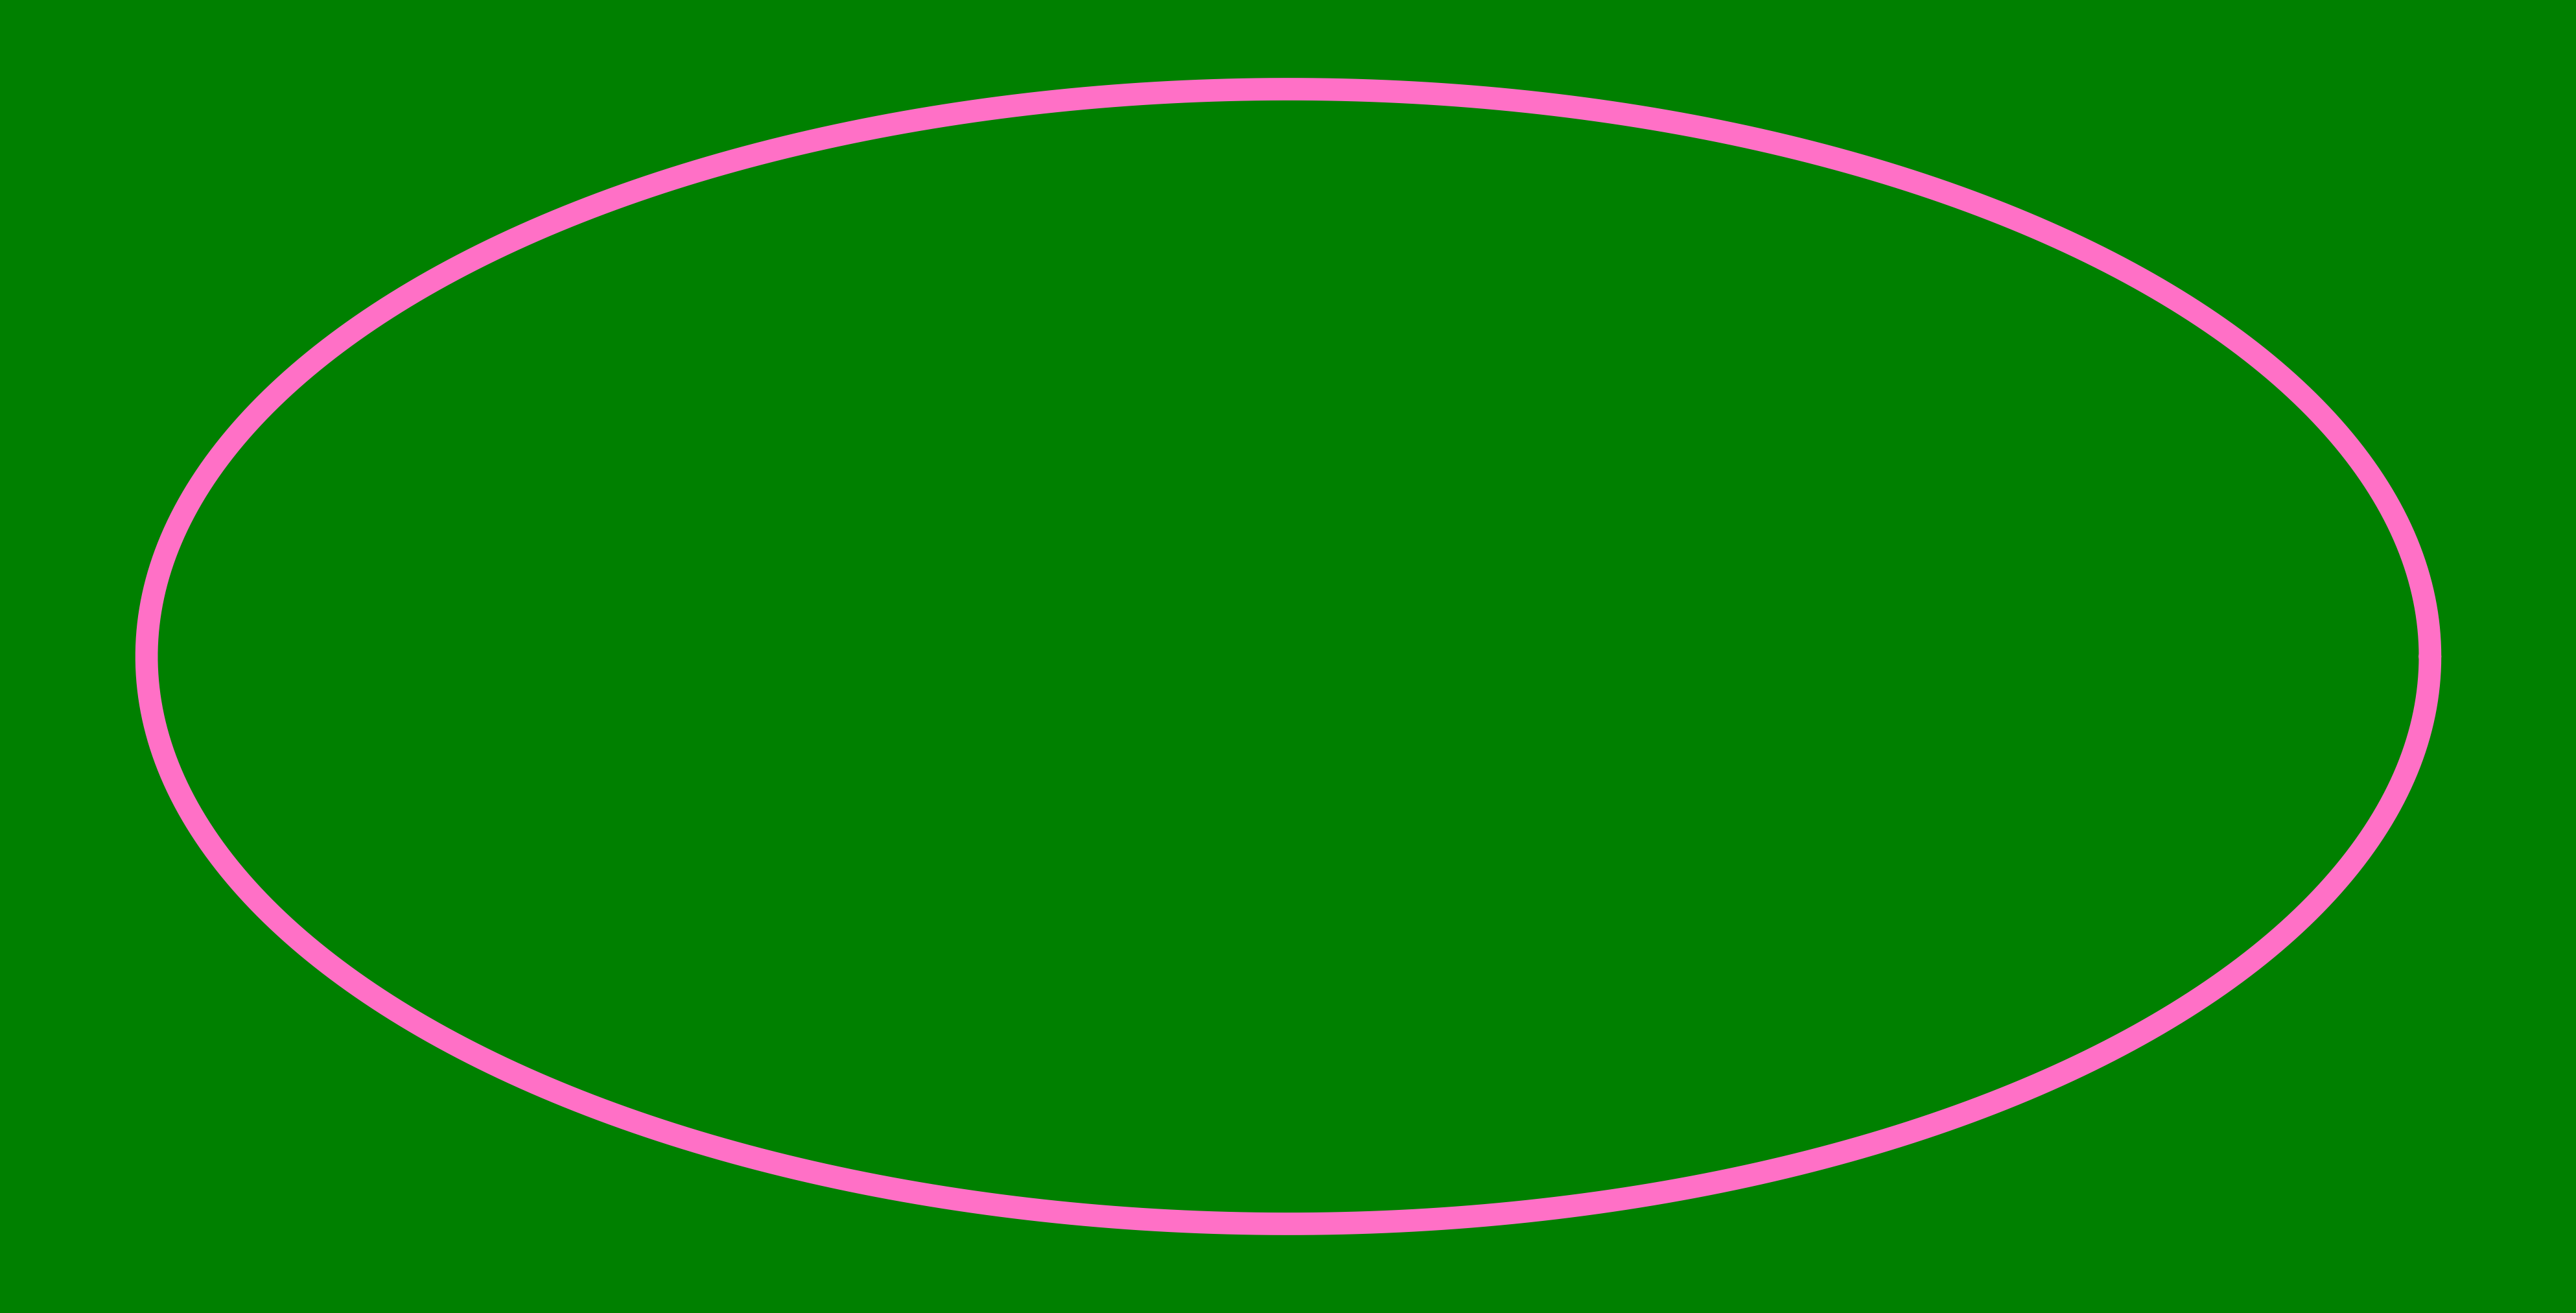

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Definir a equação da elipse (x^2/a^2 + y^2/b^2 = 1)
theta = np.linspace(0, 2 * np.pi, 500)
a, b = 6, 3  # Semi-eixos da elipse
x = a * np.cos(theta)
y = b * np.sin(theta)

# Plot da elipse
fig, ax = plt.subplots(figsize=(10, 5), dpi=500)
ax.set_facecolor('green')
fig.set_facecolor("green")
ax.grid(color='white', linewidth=0.5, alpha=0.3)

# Remover os eixos
ax.set_axis_off()

# Plotar a elipse
ax.plot(x, y, color='#FF70C6', lw=5, solid_capstyle='round', zorder=4)

# Salvar o gráfico em um arquivo PNG
plt.savefig("elipse.png", transparent=True)

# Mostrar o gráfico
plt.show()
